# Introduction
Alberta is considered as one of the most diversified cities in the Canada. It is also the center of the nation’s film and television industry. Alberta also has a diverse economy and hosts businesses in a broad range of professional and cultural fields, it has become one of the world’s premier travel destinations, attracting more than 50 million visitors in 2018. Thus, Alberta will be the best place to open a restaurant to welcome people from all over the world. The aim of this project is to study the neighborhoods in Alberta in order to decided best locations for opening a restaurant by collecting and analyzing appropriate data.



# Data Collection
Data Collection for this project will from Venue Data, Neighborhoods Data, Geographical Coordinates sources. These sources are list below.

 



### 1. Neighborhoods Data
The data of the neighborhoods in Los Angeles County was scraped from https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_T 

### 2. Venua Data
Foursquare API location data will be used in this project to help solving the problems. Foursquare API provids venue recommendations for all neighborhoods in Alberta.

### 3. Geographical Coordinates
The geographical coordinates for Alberta data has been obtained from the GeoPy library in python. This data is relevant for plotting the map of Alberta using the Folium library in python. The geocoder library in python has been used to obtain latitude and longitude data for various neighborhoods in Alberta. 

## Importing required libraries 

In [324]:
!pip install geopy
!pip install geocoder
!pip install folium

import numpy as np
import pandas as pd
import json
from geopy.geocoders import Nominatim
import geocoder
import requests
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn.cluster import KMeans
import folium
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.io.json import json_normalize
from sklearn.metrics import silhouette_score

%matplotlib notebook

print('All libraries imported.')

All libraries imported.


## Load the Data
Scraping the data from https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_T and reading it into a dataframe

In [325]:
df = pd.read_html('https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_T')[-5]
df.rename(columns={'Borough': 'Location'}, inplace=True)
df.head(10)

,Postal Code,Location,Neighborhood,Latitude,Longitude
0,T1A,Medicine Hat,Central Medicine Hat,50.036460,-110.679250
1,T2A,Calgary,"Penbrooke Meadows, Marlborough",51.049680,-113.964320
2,T3A,Calgary,"Dalhousie, Edgemont, Hamptons, Hidden Valley",51.126060,-114.143158
3,T4A,Airdrie,East Airdrie,51.272450,-113.986980
4,T5A,Edmonton,"West Clareview, East Londonderry",53.5899,-113.4413
5,T6A,Edmonton,North Capilano,53.5483,-113.408
6,T7A,Drayton Valley,Not assigned,53.2165,-114.9893
7,T8A,Sherwood Park,West Sherwood Park,53.519,-113.3216
8,T9A,Wetaskiwin,Not assigned,52.9741,-113.3646
9,T1B,Medicine Hat,South Medicine Hat,50.0172,-110.651


## Data Wrangling
Different values for Location in the Location column

In [330]:
df['Location'].value_counts()

Edmonton                                                       39
Not assigned                                                   36
Calgary                                                        35
Sherwood Park                                                   6
Red Deer                                                        3
Fort McMurray                                                   3
Grande Prairie                                                  3
Medicine Hat                                                    3
Lethbridge                                                      3
Airdrie                                                         2
Rocky Mountain House                                            1
Whitecourt                                                      1
Cold Lake                                                       1
Hinton                                                          1
Barrhead                                                        1
Spruce Gro

In [328]:
#df['Location'] = df['Location'].apply(lambda x: x.split(',')[-1])
#df.head(10)

In [331]:
#df['Location'].value_counts()

### Final Dataframe

In [124]:
df

,Postal Code,Location,Neighborhood,Latitude,Longitude
0,T1A,Medicine Hat,Central Medicine Hat,50.036460,-110.679250
1,T2A,Calgary,"Penbrooke Meadows, Marlborough",51.049680,-113.964320
2,T3A,Calgary,"Dalhousie, Edgemont, Hamptons, Hidden Valley",51.126060,-114.143158
3,T4A,Airdrie,East Airdrie,51.272450,-113.986980
4,T5A,Edmonton,"West Clareview, East Londonderry",53.5899,-113.4413
...,...,...,...,...,...
175,T5Z,Edmonton,West Lake District,53.5966,-113.4882
176,T6Z,Not assigned,Not assigned,Not assigned,Not assigned
177,T7Z,Stony Plain,Not assigned,53.5202,-114.0135
178,T8Z,Not assigned,Not assigned,Not assigned,Not assigned


### Data Visualization
To understand data better

In [333]:
neighborhoods_Alberta = df.groupby('Location')['Neighborhood'].nunique()
neighborhoods_Alberta

Location
Airdrie                                                         2
Athabasca                                                       1
Banff                                                           1
Barrhead                                                        1
Beaumont                                                        1
Blackfalds                                                      1
Bonnyville                                                      1
Brooks                                                          1
Calgary                                                        35
Camrose                                                         1
Canmore                                                         1
Chestermere                                                     1
Coaldale                                                        1
Cochrane                                                        1
Cold Lake                                                       1
D

<IPython.core.display.Javascript object>


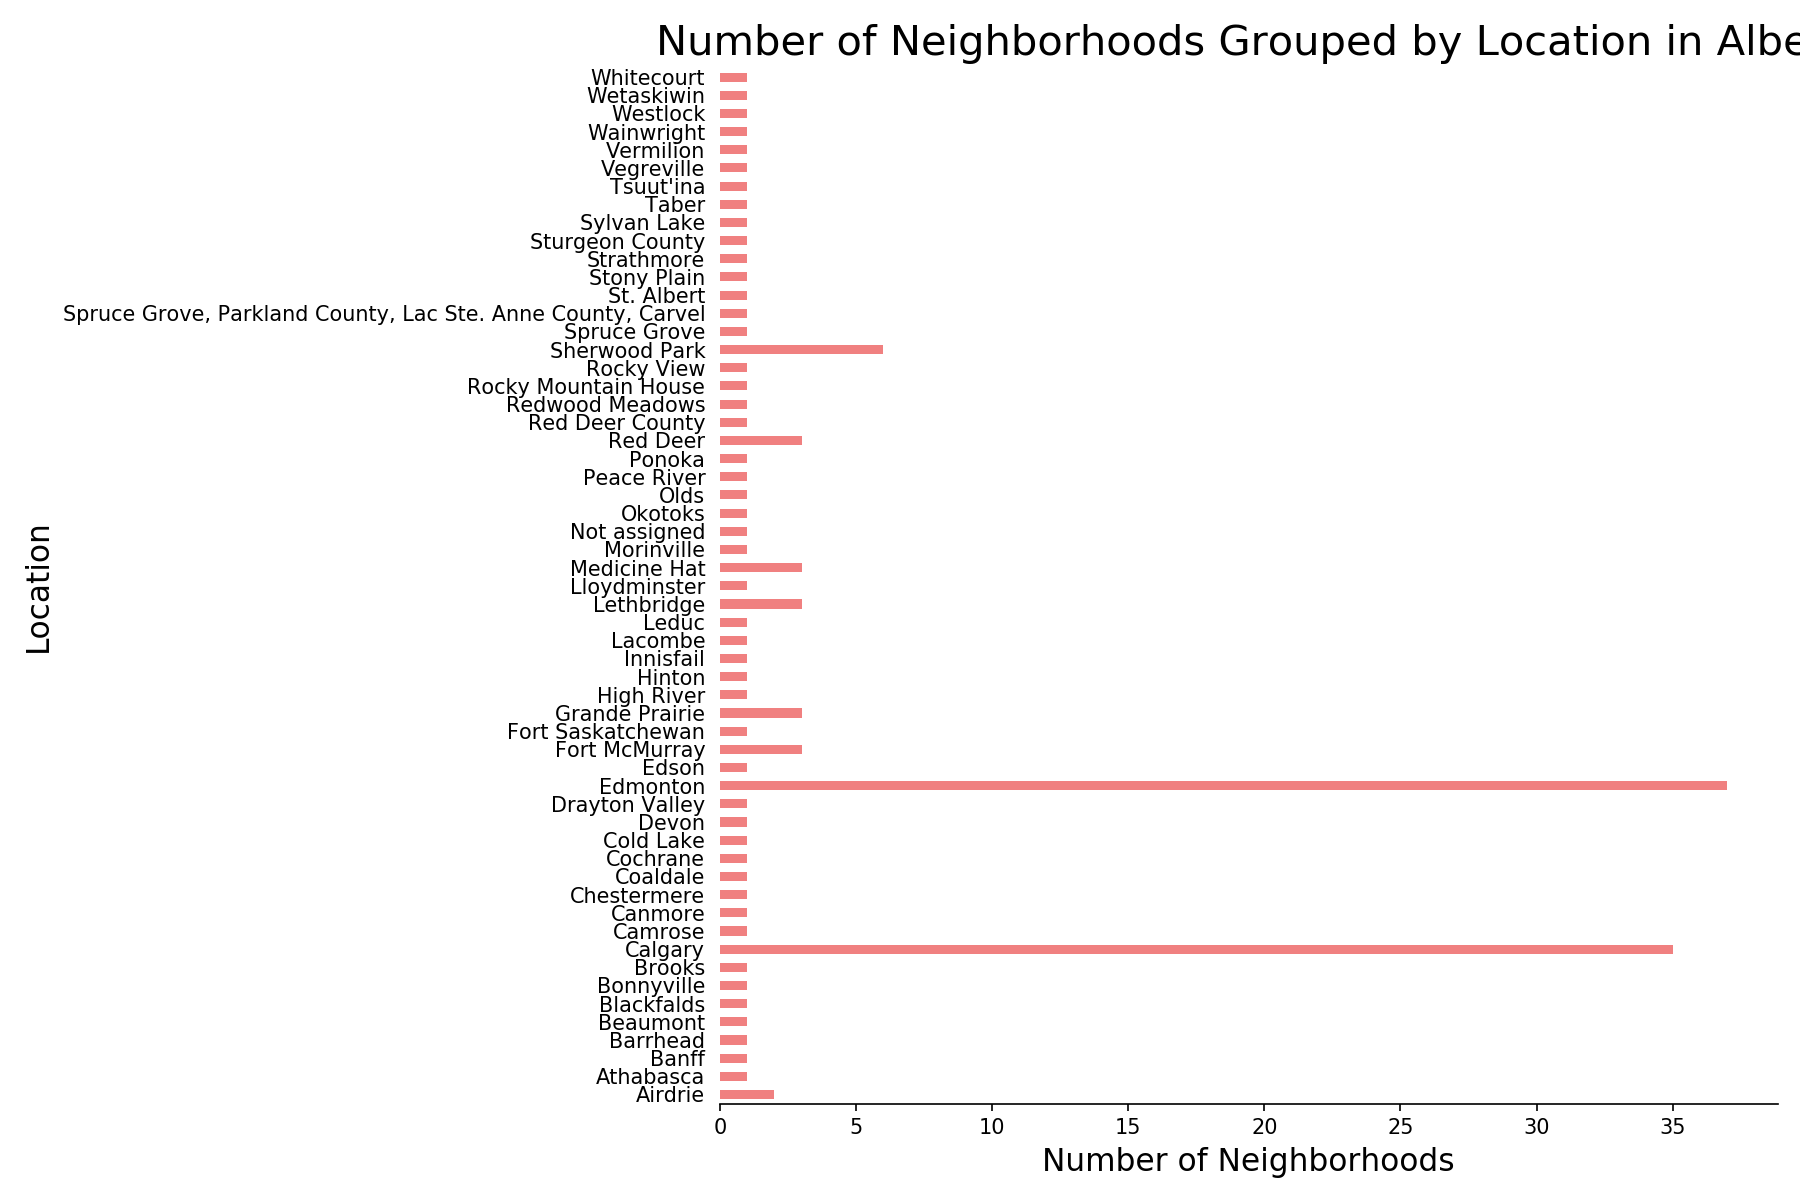

In [334]:
fig = plt.figure(figsize=(12,8))

ax = neighborhoods_Alberta.plot(kind='barh', color='lightcoral')
ax.set_title('Number of Neighborhoods Grouped by Location in Albert', fontsize=20)
ax.set_xlabel('Number of Neighborhoods', fontsize=15)
ax.set_ylabel('Location', fontsize=15)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.tick_params(which='major', left=False)

fig.tight_layout()

### Results
From the graph, we can see Edmonton and Calgary have the most number of neighborhoods

### Visualized the neighborhoods on a map using Folium.

In [135]:
address = 'Alberta, AB'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Alberta are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Alberta are 51.1310077, -114.0241697.


### Plot the map

In [137]:
# create map of Manhattan using latitude and longitude values
map_alberta = folium.Map(location=[latitude, longitude], zoom_start=10)

map_alberta

### Add markers to map

In [183]:
for lat, lng, location, neighborhood in zip(df['Latitude'], df['Longitude'], df['Location'], df['Neighborhood']):
    label = '{}, {}'.format(neighborhood, location)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_alberta)  
    
map_alberta

TypeError: must be real number, not str

# Using Foursquare API


#### This is the credentials 

In [33]:
CLIENT_ID = 'YPINFL4NIDCGY1BDUYQKSXTRXG1F5S50KX0JWY4HJGSCBWQU' # Foursquare ID
CLIENT_SECRET = 'FD20VWJUKXQSJTGLLNGBQSGJFY2QBLVCRPAJLJK342EAY2TT' #Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: YPINFL4NIDCGY1BDUYQKSXTRXG1F5S50KX0JWY4HJGSCBWQU
CLIENT_SECRET:FD20VWJUKXQSJTGLLNGBQSGJFY2QBLVCRPAJLJK342EAY2TT


#### First neighborhood in dataframe using Foursquare API

In [186]:
neighborhood_name = df.loc[0, 'Neighborhood']
neighborhood_lat = df.loc[0, 'Latitude']
neighborhood_long = df.loc[0, 'Longitude']

print("The neighborhood is {} and it's geographical coordinates are {} latitude and {} longitude".format(neighborhood_name,
                                                                                                        neighborhood_lat, neighborhood_long))

The neighborhood is Central Medicine Hat and it's geographical coordinates are 50.036460 latitude and -110.679250 longitude


In [207]:
LIMIT = 200
radius = 1000

url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_lat, 
    neighborhood_long, 
    radius, 
    LIMIT)

In [208]:
print(url)

https://api.foursquare.com/v2/venues/explore?&client_id=YPINFL4NIDCGY1BDUYQKSXTRXG1F5S50KX0JWY4HJGSCBWQU&client_secret=FD20VWJUKXQSJTGLLNGBQSGJFY2QBLVCRPAJLJK342EAY2TT&v=20180605&ll=50.036460,-110.679250&radius=1000&limit=200


#### Use the GET method to get results

In [222]:
results = requests.get(url).json()['response']['groups']
results

[{'type': 'Recommended Places',
  'name': 'recommended',
  'items': [{'reasons': {'count': 0,
     'items': [{'summary': 'This spot is popular',
       'type': 'general',
       'reasonName': 'globalInteractionReason'}]},
    'venue': {'id': '4c38ff1e18e72d7f6d7619f5',
     'name': 'Madhatter Coffee Roastery',
     'location': {'address': '513 3rd St SE',
      'lat': 50.03916323500158,
      'lng': -110.67718867205282,
      'labeledLatLngs': [{'label': 'display',
        'lat': 50.03916323500158,
        'lng': -110.67718867205282}],
      'distance': 335,
      'cc': 'CA',
      'city': 'Medicine Hat',
      'state': 'AB',
      'country': 'Canada',
      'formattedAddress': ['513 3rd St SE', 'Medicine Hat AB', 'Canada']},
     'categories': [{'id': '4bf58dd8d48988d1e0931735',
       'name': 'Coffee Shop',
       'pluralName': 'Coffee Shops',
       'shortName': 'Coffee Shop',
       'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/coffeeshop_',
        'suffix': '.pn

In [223]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

#### clean the JSON obtained using GET method and store results in a dataframe

In [257]:
#venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues)

filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues = nearby_venues.loc[:, filtered_columns]

nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

C:\Users\hanqi\anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  This is separate from the ipykernel package so we can avoid doing imports until


,name,categories,lat,lng
0,Madhatter Coffee Roastery,Coffee Shop,50.039163,-110.677189
1,Local Public Eatery Medicine Hat,Pub,50.039218,-110.676133
2,Esplanade Arts And Heritage Centre,Theater,50.039907,-110.680308
3,Dairy Queen,Ice Cream Shop,50.037920,-110.680125
4,Thúy Tiên,Vietnamese Restaurant,50.041009,-110.675177


#### Check how many venues were returned by Foursquare

In [254]:
print("{} venues were returned for {} by Foursquare".format(len(nearby_venues), neighborhood_name))

2634 venues were returned for Central Medicine Hat by Foursquare


## Generalizing Foursquare API 

#### Create the function getNearbyVenues to get nearby venues for all neighborhoods

In [335]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
        try:
           
            url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
                CLIENT_ID, 
                CLIENT_SECRET, 
                VERSION, 
                lat, 
                lng, 
                radius, 
                LIMIT)
            results = requests.get(url).json()["response"]['groups'][0]['items']
            venues_list.append([(
                                name, 
                                lat, 
                                lng, 
                                v['venue']['name'], 
                                v['venue']['location']['lat'], 
                                v['venue']['location']['lng'],  
                                v['venue']['categories'][0]['name']) for v in results])

        except:
           pass
                 
    
    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [259]:
nearby_venues = getNearbyVenues(names=df['Neighborhood'], latitudes=df['Latitude'], longitudes=df['Longitude'], radius=radius)

Central Medicine Hat
Penbrooke Meadows, Marlborough
Dalhousie, Edgemont, Hamptons, Hidden Valley
East Airdrie
West Clareview, East Londonderry
North Capilano
Not assigned
West Sherwood Park
Not assigned
South Medicine Hat
Forest Lawn, Dover, Erin Woods
Montgomery, Bowness, Silver Springs, Greenwood
West Airdrie
East North Central, West Beverly
SE Capilano, West Southeast Industrial, East Bonnie Doon
Not assigned
Outer Southwest
Not assigned
North Medicine Hat
Lynnwood Ridge, Ogden, Foothills Industrial, Great Plains
Rosscarrock, Westgate, Wildwood, Shaganappi, Sunalta
Not assigned
Central Londonderry
Central Bonnie Doon
Not assigned
Inner Southwest Sherwood Park
Not assigned
Not assigned
Bridgeland, Greenview, Zoo, YYC
Lakeview, Glendale, Killarney, Glamorgan
Not assigned
West Londonderry, East Calder
South Bonnie Doon, East University
Not assigned
Central Sherwood Park (Ardrossan)
Leduc (Includes YEG)
Not assigned
Inglewood, Burnsland, Chinatown, East Victoria Park, Saddledome
Hawkwoo

#### Nearby_venues Dataframe

In [360]:
print(nearby_venues.shape)
nearby_venues.head(51)

(2634, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Central Medicine Hat,50.036460,-110.679250,Madhatter Coffee Roastery,50.039163,-110.677189,Coffee Shop
1,Central Medicine Hat,50.036460,-110.679250,Local Public Eatery Medicine Hat,50.039218,-110.676133,Pub
2,Central Medicine Hat,50.036460,-110.679250,Esplanade Arts And Heritage Centre,50.039907,-110.680308,Theater
3,Central Medicine Hat,50.036460,-110.679250,Dairy Queen,50.037920,-110.680125,Ice Cream Shop
4,Central Medicine Hat,50.036460,-110.679250,Thúy Tiên,50.041009,-110.675177,Vietnamese Restaurant
5,Central Medicine Hat,50.036460,-110.679250,Swirls,50.035248,-110.687189,Ice Cream Shop
6,Central Medicine Hat,50.036460,-110.679250,Dayzoff Pub,50.033250,-110.669644,Pub
7,Central Medicine Hat,50.036460,-110.679250,Tim Hortons,50.042871,-110.671981,Coffee Shop
8,Central Medicine Hat,50.036460,-110.679250,Subway,50.040062,-110.676073,Sandwich Place
9,Central Medicine Hat,50.036460,-110.679250,TD Canada Trust,50.039671,-110.675277,Bank


#### How many venues were returned for each neighborhood

In [337]:
nearby_venues.groupby('Neighborhood', as_index=False).count()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"Braeside, Cedarbrae, Woodbine",15,15,15,15,15,15
1,"Brentwood, Collingwood, Nose Hill",5,5,5,5,5,5
2,"Bridgeland, Greenview, Zoo, YYC",59,59,59,59,59,59
3,Central Beverly,23,23,23,23,23,23
4,Central Bonnie Doon,27,27,27,27,27,27
...,...,...,...,...,...,...,...
88,"West Northwest Industrial, Winterburn",81,81,81,81,81,81
89,West Sherwood Park,27,27,27,27,27,27
90,"West University, Strathcona Place",35,35,35,35,35,35
91,West and Central Lethbridge,26,26,26,26,26,26


#### Check how many unique categories in the data

In [338]:
print('There are {} uniques categories.'.format(len(nearby_venues['Venue Category'].unique())))

There are 253 uniques categories.


#### Display the most common venue categories in 6 selected neighborhoods

<IPython.core.display.Javascript object>


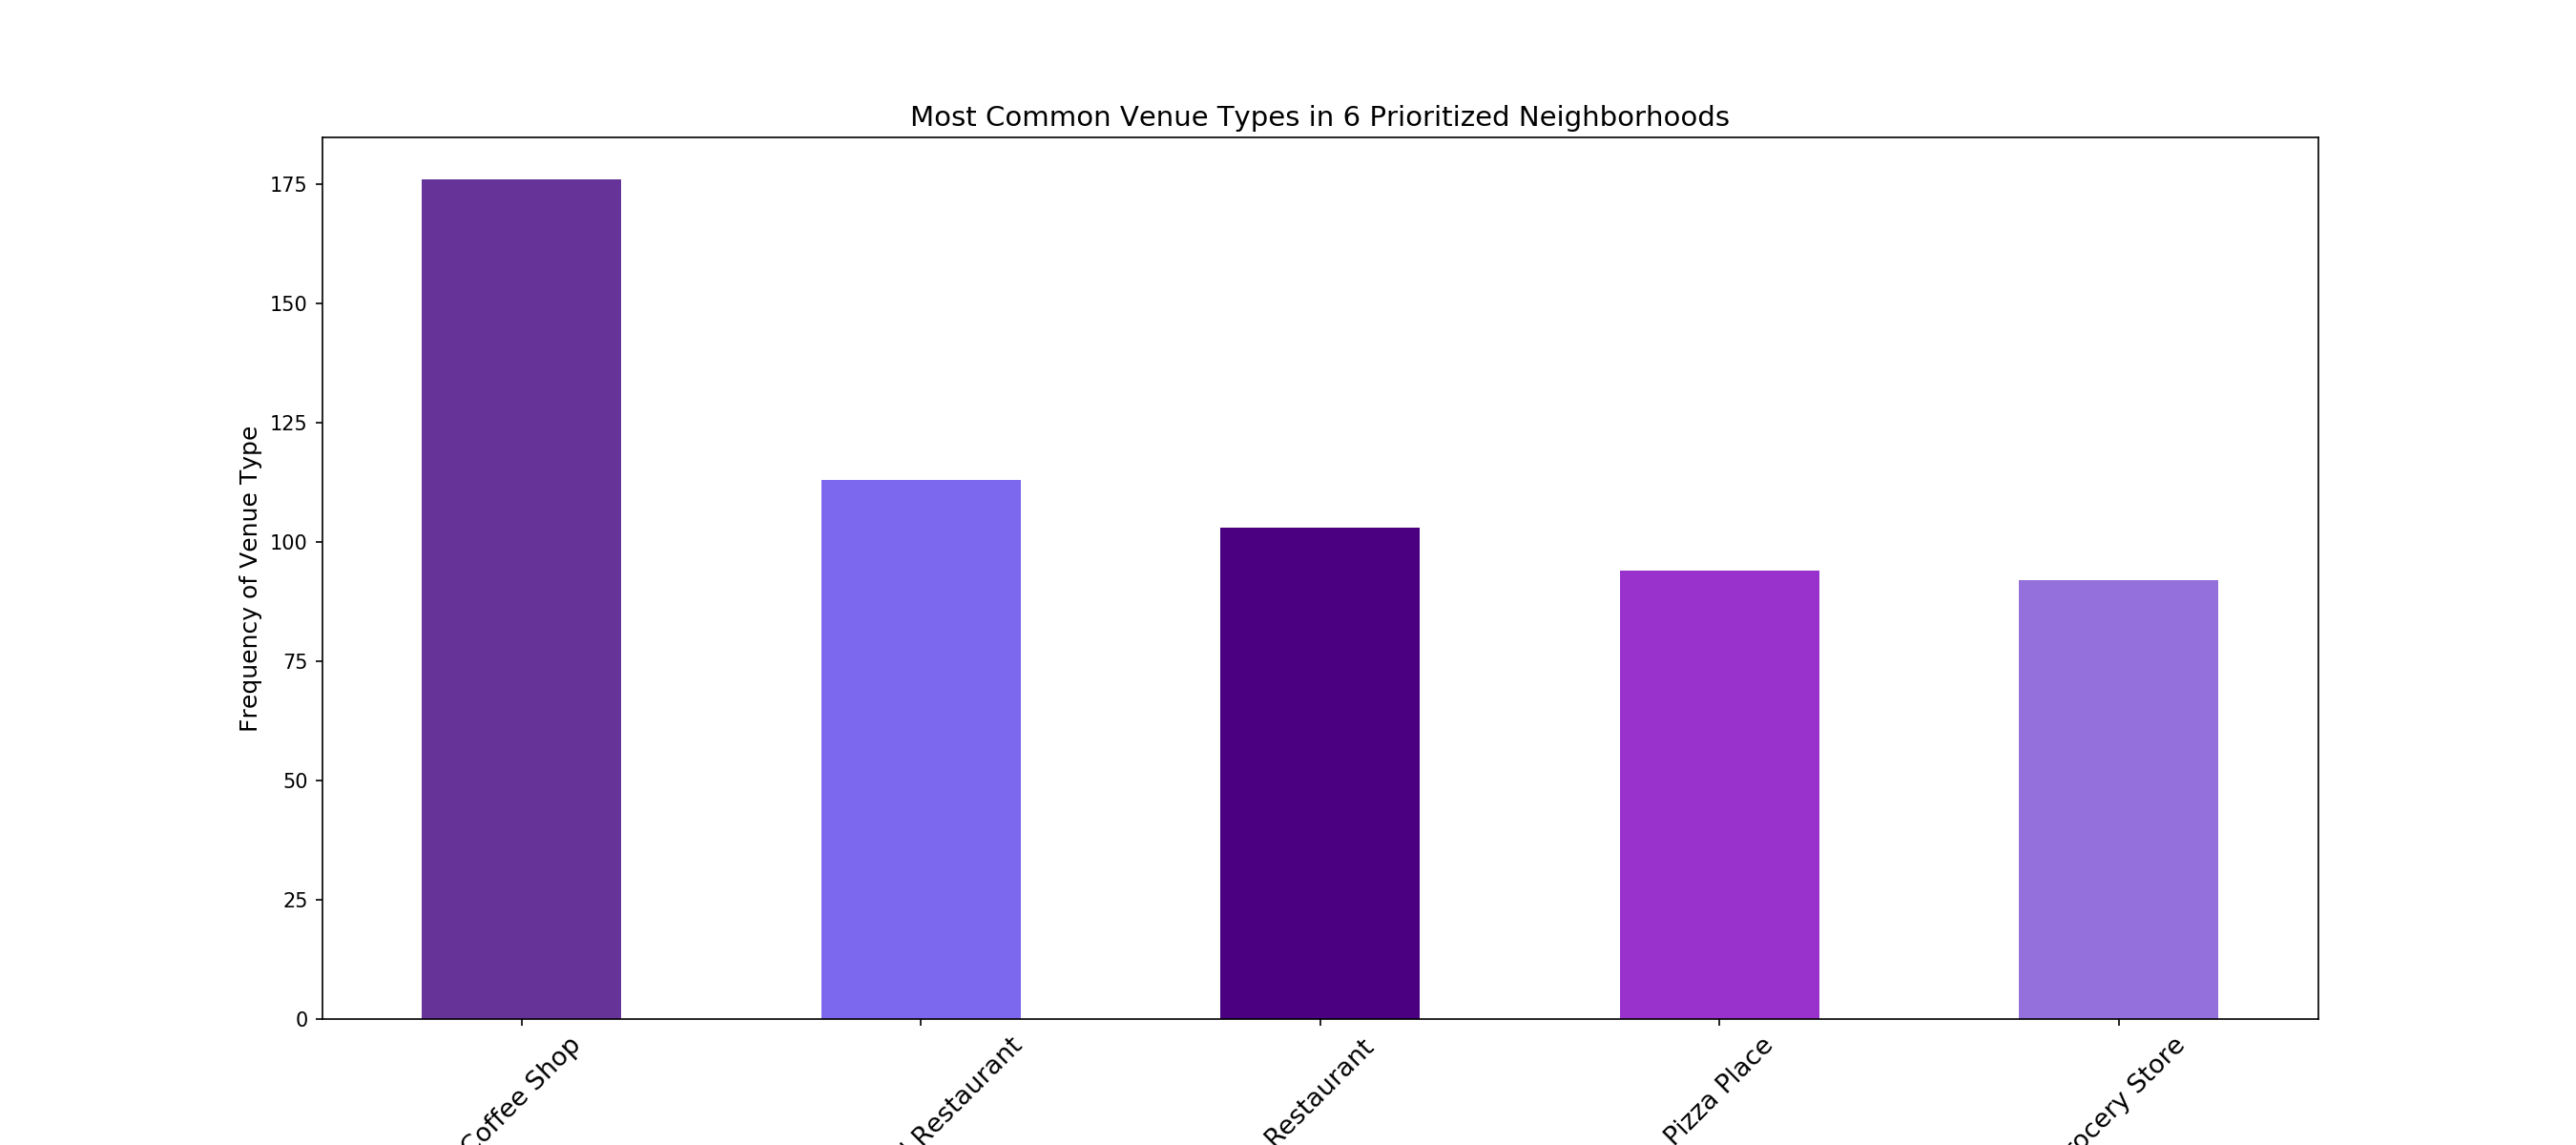

In [339]:
alberta_top_venues = nearby_venues.groupby('Venue Category', as_index = False).count().sort_values('Neighborhood', ascending = False).head(5)
alberta_top_venues = alberta_top_venues[['Venue Category','Neighborhood']]
alberta_top_venues.rename(columns={'Neighborhood': 'Frequency'}, inplace = True)
alberta_top_venues.plot.bar(x='Venue Category', y='Frequency', legend = None, title = "Most common venue types in 6 prioritized neighborhoods", rot= 45, figsize = (18, 8), color=['rebeccapurple','mediumslateblue','indigo','darkorchid','mediumpurple'])
plt.ylabel('Frequency of Venue Type', fontsize=12)
plt.xticks(fontsize=13)
plt.xlabel('Venue Type', fontsize=12)
plt.title('Most Common Venue Types in 6 Prioritized Neighborhoods', fontsize = 14)
plt.show()

#### one hot encoding

In [340]:

alberta_onehot = pd.get_dummies(nearby_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
alberta_onehot['Neighborhood'] = nearby_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [alberta_onehot.columns[-1]] + list(alberta_onehot.columns[:-1])
alberta_onehot = alberta_onehot[fixed_columns]

alberta_onehot.head()

,Neighborhood,American Restaurant,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Dealership,Auto Garage,Automotive Shop,BBQ Joint,...,Video Store,Vietnamese Restaurant,Warehouse Store,Water Park,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,Central Medicine Hat,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Central Medicine Hat,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Central Medicine Hat,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Central Medicine Hat,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Central Medicine Hat,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


#### the shape of new dataframe

In [296]:
alberta_onehot.shape

(2634, 254)

#### group the data

In [341]:
#now group the data
alberta_grouped = alberta_onehot.groupby('Neighborhood').mean().reset_index()
print(alberta_grouped.shape)
alberta_grouped

(93, 254)


,Neighborhood,American Restaurant,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Dealership,Auto Garage,Automotive Shop,BBQ Joint,...,Video Store,Vietnamese Restaurant,Warehouse Store,Water Park,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,"Braeside, Cedarbrae, Woodbine",0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0
1,"Brentwood, Collingwood, Nose Hill",0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0
2,"Bridgeland, Greenview, Zoo, YYC",0.000000,0.0,0.000000,0.016949,0.000000,0.000000,0.0,0.000000,0.016949,...,0.0,0.050847,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0
3,Central Beverly,0.000000,0.0,0.000000,0.000000,0.043478,0.000000,0.0,0.000000,0.000000,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0
4,Central Bonnie Doon,0.037037,0.0,0.000000,0.037037,0.000000,0.000000,0.0,0.000000,0.000000,...,0.0,0.037037,0.0,0.037037,0.0,0.0,0.0,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,"West Northwest Industrial, Winterburn",0.012346,0.0,0.024691,0.024691,0.000000,0.012346,0.0,0.024691,0.000000,...,0.0,0.012346,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0
89,West Sherwood Park,0.074074,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.037037,0.0,0.0
90,"West University, Strathcona Place",0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0
91,West and Central Lethbridge,0.115385,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0


#### show the frequency of the top 5 types of venues for each neighborhood

In [344]:
num_top_venues = 5

for hood in alberta_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = alberta_grouped[alberta_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Braeside, Cedarbrae, Woodbine----
            venue  freq
0     Coffee Shop  0.13
1             Pub  0.13
2  Ice Cream Shop  0.07
3    Hockey Arena  0.07
4            Pool  0.07


----Brentwood, Collingwood, Nose Hill----
                 venue  freq
0             Building   0.2
1  Sporting Goods Shop   0.2
2    Elementary School   0.2
3          Hockey Rink   0.2
4    Convenience Store   0.2


----Bridgeland, Greenview, Zoo, YYC----
                  venue  freq
0    Chinese Restaurant  0.07
1    Italian Restaurant  0.05
2        Sandwich Place  0.05
3  Fast Food Restaurant  0.05
4                   Pub  0.05


----Central Beverly----
                  venue  freq
0  Fast Food Restaurant  0.09
1            Restaurant  0.09
2           Pizza Place  0.09
3          Hockey Arena  0.04
4           Music Store  0.04


----Central Bonnie Doon----
                 venue  freq
0        Grocery Store  0.11
1              Theater  0.07
2  American Restaurant  0.04
3                Trail  0.

#### place data into a dataframe of the most popular venues for each neighborhood

In [343]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [345]:
num_top_venues = 30

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = SF_grouped['Neighborhood']

for ind in np.arange(alberta_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(alberta_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,...,21th Most Common Venue,22th Most Common Venue,23th Most Common Venue,24th Most Common Venue,25th Most Common Venue,26th Most Common Venue,27th Most Common Venue,28th Most Common Venue,29th Most Common Venue,30th Most Common Venue
0,"Braeside, Cedarbrae, Woodbine",Pub,Coffee Shop,Pool,Hockey Arena,Hobby Shop,Sandwich Place,Ice Cream Shop,Pizza Place,Pharmacy,...,Flower Shop,Fondue Restaurant,Factory,Elementary School,Event Space,Ethiopian Restaurant,Food Court,Electronics Store,Eastern European Restaurant,Dry Cleaner
1,"Brentwood, Collingwood, Nose Hill",Building,Hockey Rink,Elementary School,Convenience Store,Sporting Goods Shop,Distribution Center,Dog Run,Fried Chicken Joint,French Restaurant,...,Fast Food Restaurant,Farmers Market,Frozen Yogurt Shop,Factory,Event Space,Ethiopian Restaurant,Diner,Electronics Store,Eastern European Restaurant,Dry Cleaner
2,"Bridgeland, Greenview, Zoo, YYC",Chinese Restaurant,Italian Restaurant,Coffee Shop,Sandwich Place,Pub,Vietnamese Restaurant,Fast Food Restaurant,Gas Station,Noodle House,...,Dessert Shop,Burger Joint,Sports Bar,Steakhouse,Supermarket,Dim Sum Restaurant,Restaurant,Diner,Japanese Restaurant,Indian Restaurant
3,Central Beverly,Restaurant,Fast Food Restaurant,Pizza Place,Hockey Arena,Inn,Nightclub,Music Venue,Music Store,Sandwich Place,...,Grocery Store,Falafel Restaurant,Hardware Store,Financial or Legal Service,Filipino Restaurant,Field,Health & Beauty Service,Health Food Store,Farmers Market,Historic Site
4,Central Bonnie Doon,Grocery Store,Theater,American Restaurant,Irish Pub,Ethiopian Restaurant,Cosmetics Shop,Convenience Store,Music Venue,Coffee Shop,...,Asian Restaurant,Vietnamese Restaurant,Water Park,Hockey Arena,Gym / Fitness Center,History Museum,Field,Financial or Legal Service,Filipino Restaurant,Farmers Market
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,"West Northwest Industrial, Winterburn",Hotel,Coffee Shop,Fast Food Restaurant,Pizza Place,Restaurant,Grocery Store,Sandwich Place,Bar,Arts & Crafts Store,...,Italian Restaurant,Food & Drink Shop,Post Office,Chinese Restaurant,Sports Bar,Miscellaneous Shop,Health Food Store,Cosmetics Shop,Department Store,Dim Sum Restaurant
89,West Sherwood Park,Fast Food Restaurant,Coffee Shop,Pharmacy,American Restaurant,Bank,Pizza Place,Smoothie Shop,Burger Joint,Gas Station,...,Fondue Restaurant,Flower Shop,Flea Market,Financial or Legal Service,Filipino Restaurant,Field,Hockey Arena,Hockey Field,Farmers Market,Factory
90,"West University, Strathcona Place",Coffee Shop,Sandwich Place,Pub,Theater,Park,Fast Food Restaurant,Restaurant,College Gym,College Residence Hall,...,Hotel,Farmers Market,Fondue Restaurant,Flower Shop,Flea Market,Financial or Legal Service,Filipino Restaurant,Field,Event Space,Ethiopian Restaurant
91,West and Central Lethbridge,American Restaurant,Pharmacy,Pub,Café,Bank,Grocery Store,Pizza Place,Hobby Shop,Bar,...,Food Court,Financial or Legal Service,Filipino Restaurant,Food Truck,Flower Shop,Field,Dog Run,Fast Food Restaurant,Farmers Market,Falafel Restaurant


# Cluster Neighborhoods

#### set number of clusters

In [346]:
kclusters = 3

alberta_grouped_clustering = alberta_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(alberta_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([2, 0, 2, 2, 0, 2, 2, 2, 2, 0])

#### create a dataframe that includes the cluster as well as the top 10 venues for each neighborhood

In [350]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'cluster Labels', kmeans.labels_)

alberta_merged = df

# merge manhattan_grouped with manhattan_data to add latitude/longitude for each neighborhood
alberta_merged = alberta_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

alberta_merged.head() # check the last columns!  

,Postal Code,Location,Neighborhood,Latitude,Longitude,cluster Labels,luster Labels,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,...,21th Most Common Venue,22th Most Common Venue,23th Most Common Venue,24th Most Common Venue,25th Most Common Venue,26th Most Common Venue,27th Most Common Venue,28th Most Common Venue,29th Most Common Venue,30th Most Common Venue
0,T1A,Medicine Hat,Central Medicine Hat,50.036460,-110.679250,2.0,2.0,2.0,Coffee Shop,Pub,...,Fast Food Restaurant,Food Court,Farmers Market,Financial or Legal Service,Yoga Studio,Factory,Event Space,Football Stadium,Ethiopian Restaurant,Elementary School
1,T2A,Calgary,"Penbrooke Meadows, Marlborough",51.049680,-113.964320,0.0,0.0,0.0,Pizza Place,Pharmacy,...,Filipino Restaurant,Field,Diner,Farmers Market,Event Space,Factory,Dry Cleaner,Discount Store,Ethiopian Restaurant,Distribution Center
2,T3A,Calgary,"Dalhousie, Edgemont, Hamptons, Hidden Valley",51.126060,-114.143158,0.0,0.0,0.0,Trail,Gas Station,...,Factory,Event Space,Ethiopian Restaurant,Elementary School,Electronics Store,Eastern European Restaurant,Dry Cleaner,Donut Shop,Dog Run,Distribution Center
3,T4A,Airdrie,East Airdrie,51.272450,-113.986980,2.0,2.0,2.0,Pub,Fast Food Restaurant,...,Flea Market,Financial or Legal Service,Filipino Restaurant,Field,Eastern European Restaurant,Dog Run,Farmers Market,Frame Store,Falafel Restaurant,Factory
4,T5A,Edmonton,"West Clareview, East Londonderry",53.5899,-113.4413,0.0,0.0,0.0,Hotel,Auto Garage,...,Fast Food Restaurant,Field,Frozen Yogurt Shop,Farmers Market,Falafel Restaurant,Factory,Event Space,Ethiopian Restaurant,Elementary School,Electronics Store


## Cluster 1

In [364]:
alberta_merged.loc[alberta_merged['Cluster Labels'] == 0, alberta_merged.columns[[0] + [1] + list(range(5, alberta_merged.shape[1]))]]

,Postal Code,Location,cluster Labels,luster Labels,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,...,21th Most Common Venue,22th Most Common Venue,23th Most Common Venue,24th Most Common Venue,25th Most Common Venue,26th Most Common Venue,27th Most Common Venue,28th Most Common Venue,29th Most Common Venue,30th Most Common Venue
1,T2A,Calgary,0.0,0.0,0.0,Pizza Place,Pharmacy,Convenience Store,Pub,Bank,...,Filipino Restaurant,Field,Diner,Farmers Market,Event Space,Factory,Dry Cleaner,Discount Store,Ethiopian Restaurant,Distribution Center
2,T3A,Calgary,0.0,0.0,0.0,Trail,Gas Station,Café,Convenience Store,Yoga Studio,...,Factory,Event Space,Ethiopian Restaurant,Elementary School,Electronics Store,Eastern European Restaurant,Dry Cleaner,Donut Shop,Dog Run,Distribution Center
4,T5A,Edmonton,0.0,0.0,0.0,Hotel,Auto Garage,Light Rail Station,Toy / Game Store,Comedy Club,...,Fast Food Restaurant,Field,Frozen Yogurt Shop,Farmers Market,Falafel Restaurant,Factory,Event Space,Ethiopian Restaurant,Elementary School,Electronics Store
10,T2B,Calgary,0.0,0.0,0.0,Convenience Store,Grocery Store,Vietnamese Restaurant,Sandwich Place,Fried Chicken Joint,...,Fondue Restaurant,Financial or Legal Service,Filipino Restaurant,Food & Drink Shop,Food Court,Yoga Studio,Factory,Farmers Market,Frame Store,Event Space
23,T6C,Edmonton,0.0,0.0,0.0,Grocery Store,Theater,American Restaurant,Irish Pub,Ethiopian Restaurant,...,Asian Restaurant,Vietnamese Restaurant,Water Park,Hockey Arena,Gym / Fitness Center,History Museum,Field,Financial or Legal Service,Filipino Restaurant,Farmers Market
29,T3E,Calgary,0.0,0.0,0.0,Yoga Studio,Bakery,School,Chinese Restaurant,Sports Bar,...,Mexican Restaurant,Convenience Store,Elementary School,Electronics Store,Fondue Restaurant,Flower Shop,Flea Market,Financial or Legal Service,Filipino Restaurant,Field
31,T5E,Edmonton,0.0,0.0,0.0,Dessert Shop,Recreation Center,Supplement Shop,Sandwich Place,Grocery Store,...,Flower Shop,Discount Store,Flea Market,Financial or Legal Service,Filipino Restaurant,Farmers Market,Fast Food Restaurant,Donut Shop,Falafel Restaurant,Factory
35,T9E,Leduc,0.0,0.0,0.0,Gym / Fitness Center,Convenience Store,Fast Food Restaurant,Baseball Field,Performing Arts Venue,...,Falafel Restaurant,Fried Chicken Joint,Factory,Event Space,Ethiopian Restaurant,Elementary School,Electronics Store,Eastern European Restaurant,Dry Cleaner,Donut Shop
40,T5G,Edmonton,0.0,0.0,0.0,Bakery,BBQ Joint,Café,Food & Drink Shop,Gastropub,...,Filipino Restaurant,Field,Fondue Restaurant,Yoga Studio,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Factory,Football Stadium,Ethiopian Restaurant
45,T1H,Lethbridge,0.0,0.0,0.0,Convenience Store,Food & Drink Shop,Grocery Store,Hockey Arena,Coffee Shop,...,Fried Chicken Joint,Factory,Event Space,Ethiopian Restaurant,Elementary School,Electronics Store,Eastern European Restaurant,Dry Cleaner,Donut Shop,Dog Run


## Cluster 2

In [365]:
alberta_merged.loc[alberta_merged['Cluster Labels'] == 1, alberta_merged.columns[[0] + [1] + list(range(5, alberta_merged.shape[1]))]]

,Postal Code,Location,cluster Labels,luster Labels,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,...,21th Most Common Venue,22th Most Common Venue,23th Most Common Venue,24th Most Common Venue,25th Most Common Venue,26th Most Common Venue,27th Most Common Venue,28th Most Common Venue,29th Most Common Venue,30th Most Common Venue
43,T8G,Sherwood Park,1.0,1.0,1.0,Construction & Landscaping,Yoga Studio,Farmers Market,French Restaurant,Frame Store,...,Ethiopian Restaurant,Elementary School,Electronics Store,Eastern European Restaurant,Dry Cleaner,Donut Shop,Dog Run,Distribution Center,Discount Store,Diner
62,T9J,Fort McMurray,1.0,1.0,1.0,Construction & Landscaping,American Restaurant,Trail,Fondue Restaurant,Field,...,Event Space,Ethiopian Restaurant,Elementary School,Electronics Store,Eastern European Restaurant,Dry Cleaner,Donut Shop,Dog Run,Distribution Center,Discount Store


## Cluster 3 

In [366]:
alberta_merged.loc[alberta_merged['Cluster Labels'] == 2, alberta_merged.columns[[0] + [1] + list(range(5, alberta_merged.shape[1]))]]

,Postal Code,Location,cluster Labels,luster Labels,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,...,21th Most Common Venue,22th Most Common Venue,23th Most Common Venue,24th Most Common Venue,25th Most Common Venue,26th Most Common Venue,27th Most Common Venue,28th Most Common Venue,29th Most Common Venue,30th Most Common Venue
0,T1A,Medicine Hat,2.0,2.0,2.0,Coffee Shop,Pub,Ice Cream Shop,Theater,Park,...,Fast Food Restaurant,Food Court,Farmers Market,Financial or Legal Service,Yoga Studio,Factory,Event Space,Football Stadium,Ethiopian Restaurant,Elementary School
3,T4A,Airdrie,2.0,2.0,2.0,Pub,Fast Food Restaurant,Bank,Gas Station,Sushi Restaurant,...,Flea Market,Financial or Legal Service,Filipino Restaurant,Field,Eastern European Restaurant,Dog Run,Farmers Market,Frame Store,Falafel Restaurant,Factory
5,T6A,Edmonton,2.0,2.0,2.0,Fast Food Restaurant,Park,Pharmacy,Fruit & Vegetable Store,Frame Store,...,Event Space,Ethiopian Restaurant,Elementary School,Electronics Store,Eastern European Restaurant,Dry Cleaner,Donut Shop,Dog Run,Distribution Center,Discount Store
6,T7A,Drayton Valley,2.0,2.0,2.0,Hotel,Fast Food Restaurant,Coffee Shop,Grocery Store,Ice Cream Shop,...,Supermarket,Resort,Golf Course,Skating Rink,Italian Restaurant,Indian Restaurant,Trail,Sports Bar,Hostel,Athletics & Sports
7,T8A,Sherwood Park,2.0,2.0,2.0,Fast Food Restaurant,Coffee Shop,Pharmacy,American Restaurant,Bank,...,Fondue Restaurant,Flower Shop,Flea Market,Financial or Legal Service,Filipino Restaurant,Field,Hockey Arena,Hockey Field,Farmers Market,Factory
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,T5Z,Edmonton,2.0,2.0,2.0,Coffee Shop,Fast Food Restaurant,Japanese Restaurant,Pharmacy,Gas Station,...,Vietnamese Restaurant,Asian Restaurant,Auto Garage,Bank,Hotel,Factory,Flower Shop,Flea Market,Financial or Legal Service,Filipino Restaurant
176,T6Z,Not assigned,2.0,2.0,2.0,Hotel,Fast Food Restaurant,Coffee Shop,Grocery Store,Ice Cream Shop,...,Supermarket,Resort,Golf Course,Skating Rink,Italian Restaurant,Indian Restaurant,Trail,Sports Bar,Hostel,Athletics & Sports
177,T7Z,Stony Plain,2.0,2.0,2.0,Hotel,Fast Food Restaurant,Coffee Shop,Grocery Store,Ice Cream Shop,...,Supermarket,Resort,Golf Course,Skating Rink,Italian Restaurant,Indian Restaurant,Trail,Sports Bar,Hostel,Athletics & Sports
178,T8Z,Not assigned,2.0,2.0,2.0,Hotel,Fast Food Restaurant,Coffee Shop,Grocery Store,Ice Cream Shop,...,Supermarket,Resort,Golf Course,Skating Rink,Italian Restaurant,Indian Restaurant,Trail,Sports Bar,Hostel,Athletics & Sports


## Cluster 4

In [368]:
alberta_merged.loc[alberta_merged['Cluster Labels'] == 3, alberta_merged.columns[[0] + [1] + list(range(5, alberta_merged.shape[1]))]]

,Postal Code,Location,cluster Labels,luster Labels,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,...,21th Most Common Venue,22th Most Common Venue,23th Most Common Venue,24th Most Common Venue,25th Most Common Venue,26th Most Common Venue,27th Most Common Venue,28th Most Common Venue,29th Most Common Venue,30th Most Common Venue


## Cluster 5

In [369]:
alberta_merged.loc[alberta_merged['Cluster Labels'] == 4, alberta_merged.columns[[0] + [1] + list(range(5, alberta_merged.shape[1]))]]

,Postal Code,Location,cluster Labels,luster Labels,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,...,21th Most Common Venue,22th Most Common Venue,23th Most Common Venue,24th Most Common Venue,25th Most Common Venue,26th Most Common Venue,27th Most Common Venue,28th Most Common Venue,29th Most Common Venue,30th Most Common Venue


In [371]:
new_restaurant_neighborhoods = alberta_merged.loc[alberta_merged['Cluster Labels'] == 0, alberta_merged.columns[[0, 1, 2, 3] + list(range(5, alberta_merged.shape[1]))]]
new_restaurant_neighborhoods.head()

,Postal Code,Location,Neighborhood,Latitude,cluster Labels,luster Labels,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,...,21th Most Common Venue,22th Most Common Venue,23th Most Common Venue,24th Most Common Venue,25th Most Common Venue,26th Most Common Venue,27th Most Common Venue,28th Most Common Venue,29th Most Common Venue,30th Most Common Venue
1,T2A,Calgary,"Penbrooke Meadows, Marlborough",51.049680,0.0,0.0,0.0,Pizza Place,Pharmacy,Convenience Store,...,Filipino Restaurant,Field,Diner,Farmers Market,Event Space,Factory,Dry Cleaner,Discount Store,Ethiopian Restaurant,Distribution Center
2,T3A,Calgary,"Dalhousie, Edgemont, Hamptons, Hidden Valley",51.126060,0.0,0.0,0.0,Trail,Gas Station,Café,...,Factory,Event Space,Ethiopian Restaurant,Elementary School,Electronics Store,Eastern European Restaurant,Dry Cleaner,Donut Shop,Dog Run,Distribution Center
4,T5A,Edmonton,"West Clareview, East Londonderry",53.5899,0.0,0.0,0.0,Hotel,Auto Garage,Light Rail Station,...,Fast Food Restaurant,Field,Frozen Yogurt Shop,Farmers Market,Falafel Restaurant,Factory,Event Space,Ethiopian Restaurant,Elementary School,Electronics Store
10,T2B,Calgary,"Forest Lawn, Dover, Erin Woods",51.0318,0.0,0.0,0.0,Convenience Store,Grocery Store,Vietnamese Restaurant,...,Fondue Restaurant,Financial or Legal Service,Filipino Restaurant,Food & Drink Shop,Food Court,Yoga Studio,Factory,Farmers Market,Frame Store,Event Space
23,T6C,Edmonton,Central Bonnie Doon,53.5182,0.0,0.0,0.0,Grocery Store,Theater,American Restaurant,...,Asian Restaurant,Vietnamese Restaurant,Water Park,Hockey Arena,Gym / Fitness Center,History Museum,Field,Financial or Legal Service,Filipino Restaurant,Farmers Market


# Results and Discussion

We have already pulled data on every neighborhood in Alberta and used the data to narrow down our neighborhood in each cluster and their top 10 most common venues. 
Now we have the results from five clusters gained. Cluster 1 and Cluster 3 are more suited for restaurants while cluster 2, cluster 4 and cluster 5 are less suited. Cluster 2 include too many other venues like schools and factories. Cluster 1 and cluster 3 include higher degree of coffee shop, restaurant, hotels, supermarket and plaza complex. Thus, the neighborhoods in cluster 1 and cluster 3 will be the best area for opening a restaurant.
Compare with cluster 1 and cluster 3, cluster 3 is a better place to open a restaurant. Cluster 1 include a great amount of schools, farmers market, electronics store and hotels, while cluster 3 contains less store required smaller space. As a result, Cluster 1 would be the best place to opening a restaurant.
